In [1]:
import pandas as pd

In [2]:
pip install nltk


In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
data=pd.read_csv('/content/drive/MyDrive/spam_(2).csv',encoding='latin1')
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data.columns=["label", "message"]

In [7]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
spam_messages=data[data["label"]=="spam"]["message"]
ham_messages=data[data["label"]=="ham"]["message"]
print("No of spam messages:",len(spam_messages))
print("No of ham messages:",len(ham_messages))

No of spam messages: 747
No of ham messages: 4825


In [9]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
def text_preprocess(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    nopunc=nopunc.lower()
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]
    return nostop

In [11]:
import string
from nltk.corpus import stopwords
spam_words=text_preprocess(spam_messages)

In [12]:
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'receive',
 'entry',
 'txt',
 'apply',
 'hey',
 'darling',
 'word',
 'like',
 'fun',
 'tb',
 'xxx',
 'std',
 'chgs',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'claim',
 'call',
 'claim',
 'code',
 'valid',
 'hours',
 'mobile',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 'chances',
 'win',
 'pounds',
 'send',
 'cost',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'week',
 'free',
 'membership',
 'prize',
 'txt',
 'claim',
 'lccltd',
 'pobox',
 'use',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'message',
 'click',
 'v',
 'macedonia',
 'dont',
 'miss',
 'txt',
 'ur',
 'national',
 'team',
 'eg',
 'england',
 'scotland',
 'subscription',
 'ringtone',
 'uk',
 'mobile',
 'charged',
 'please',
 'confirm',
 'replying',
 'yes',
 'reply',
 'rodger',
 'burns',
 'msg',
 'tri

In [13]:
spam_words[10:30]

['text',
 'fa',
 'receive',
 'entry',
 'txt',
 'apply',
 'hey',
 'darling',
 'word',
 'like',
 'fun',
 'tb',
 'xxx',
 'std',
 'chgs',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea']

In [14]:
pip install WordCloud

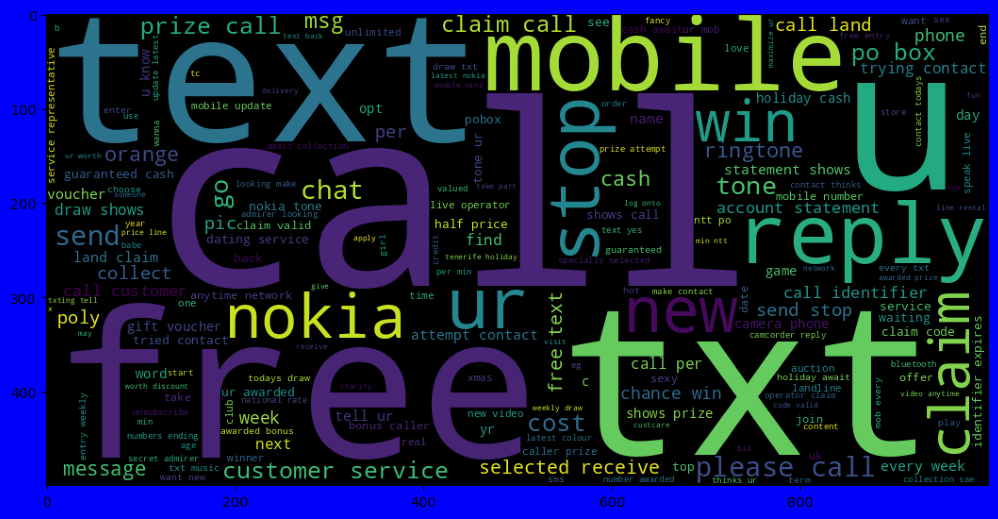

In [15]:
import matplotlib.pyplot as plt
import wordcloud
spam_wordcloud=wordcloud.WordCloud(width=1000, height=500).generate(str(' '.join(spam_words)))
plt.figure(figsize=(15, 5),facecolor='b')
plt.imshow(spam_wordcloud)
plt.tight_layout(pad=0)
plt.show()

In [16]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['message']=data['message'].apply(text_preprocess)

In [18]:
data['message']=data['message'].agg(lambda x:' '.join(map(str,x)))

In [19]:
data.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [20]:
data.head(1)

,label,message
0,ham,go jurong point crazy available bugis n great ...


In [21]:
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

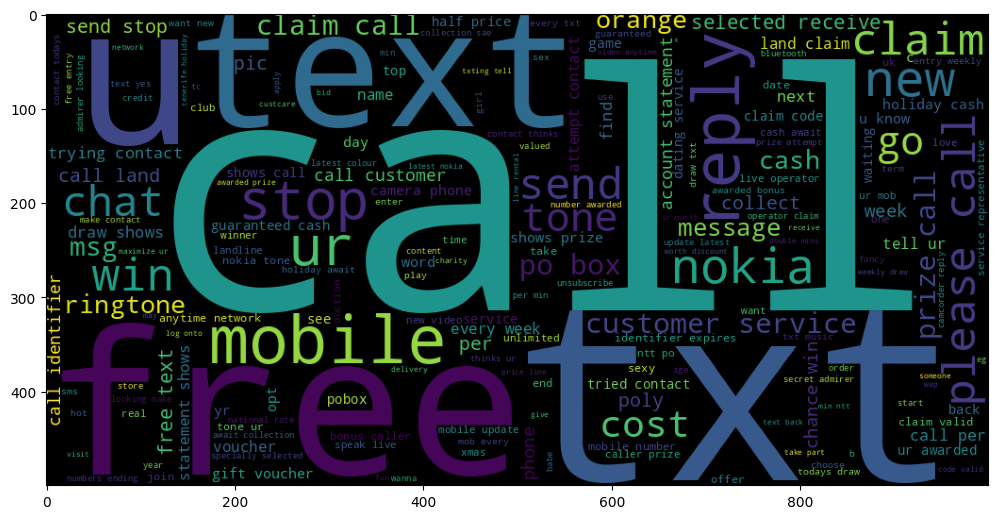

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
spamwordcloud = WordCloud(width=1000,height=500).generate(' '.join(spam_words))
plt.figure(figsize=(15, 5))
plt.imshow(spamwordcloud)
# plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [23]:
print(pd.Series(spam_words).value_counts().head(5))

call      331
free      146
txt       136
ur        129
mobile    108
dtype: int64


In [24]:
ham_words=text_preprocess(ham_messages)

In [25]:
ham_words

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine',
 'got',
 'amore',
 'joking',
 'wif',
 'u',
 'dun',
 'say',
 'early',
 'u',
 'c',
 'already',
 'think',
 'goes',
 'lives',
 'around',
 'thougheven',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'per',
 'request',
 'melle',
 'minnaminunginte',
 'nurungu',
 'set',
 'callertune',
 'press',
 'copy',
 'friends',
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'cried',
 'enough',
 'searching',
 'right',
 'words',
 'thank',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'wonderful',
 'blessing',
 'date',
 'sunday',
 'watching',
 'u',
 'remember',
 'spell',
 'yes',
 'v',
 'naughty',
 'make',
 'v',
 'thatåõs',
 'way',
 'u',
 'thatåõs',
 'way',
 'gota',
 'bis',
 'seriously',
 'spell',
 'going',
 'try',
 'months',
 'ha',
 'ha',
 'jokingso',
 'pay',
 'first',
 'da',
 'stock',
 'finish',
 'lunch',
 'go',
 'str',
 'ard',
 'smth',
 'u',
 'finish',
 'ur',
 'lunch

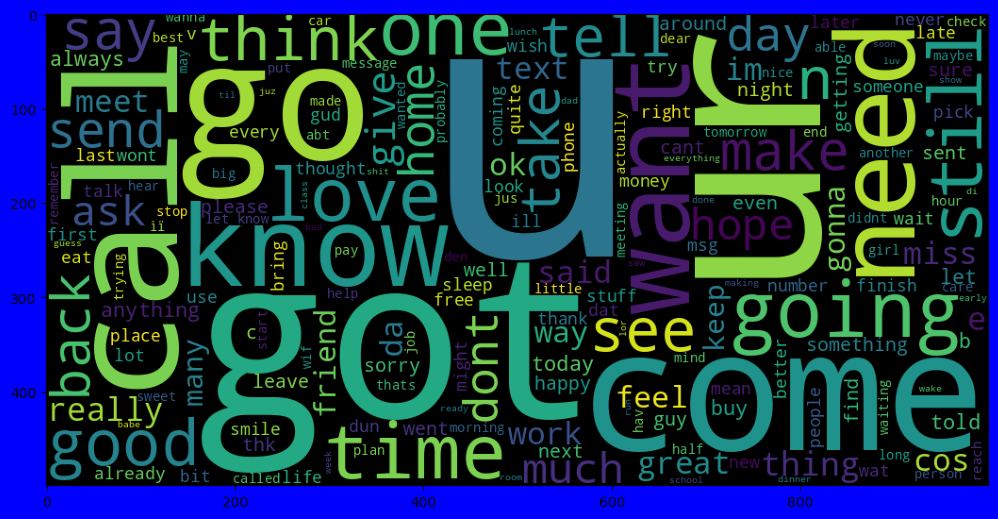

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
hamwordcloud=WordCloud(width=1000,height=500).generate(' '.join(ham_words))
plt.figure(figsize=(15,5),facecolor='b')
plt.imshow(hamwordcloud)
# plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [27]:
print(pd.Series(ham_words).value_counts().head(5))

u      820
get    287
ur     235
go     231
got    216
dtype: int64


In [28]:
data.head()

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
bow_transformer=vectorizer.fit(data['message'])
print('20 Bag of Words:\n')
print(vectorizer.get_feature_names_out()[1:10])
print('20 Vocabulary Words:\n',len(vectorizer.vocabulary_))

20 Bag of Words:

['aah' 'aaniye' 'aaooooright' 'aathilove' 'aathiwhere' 'ab' 'abbey'
 'abdomen' 'abeg']
20 Vocabulary Words:
 8084


In [30]:
print(vectorizer.vocabulary_)

{'go': 2733, 'jurong': 3591, 'point': 5218, 'crazy': 1483, 'available': 464, 'bugis': 897, 'great': 2824, 'world': 7849, 'la': 3740, 'buffet': 895, 'cine': 1208, 'got': 2787, 'amore': 233, 'wat': 7624, 'ok': 4806, 'lar': 3776, 'joking': 3559, 'wif': 7750, 'oni': 4838, 'free': 2533, 'entry': 2124, 'wkly': 7803, 'comp': 1319, 'win': 7764, 'fa': 2256, 'cup': 1536, 'final': 2380, 'tkts': 7092, 'may': 4194, 'text': 6937, 'receive': 5602, 'questionstd': 5497, 'txt': 7295, 'ratetcs': 5548, 'apply': 319, 'dun': 1981, 'say': 5945, 'early': 2000, 'hor': 3141, 'already': 207, 'nah': 4525, 'dont': 1891, 'think': 7005, 'goes': 2745, 'usf': 7435, 'lives': 3935, 'around': 369, 'though': 7024, 'freemsg': 2540, 'hey': 3040, 'darling': 1598, 'weeks': 7673, 'word': 7835, 'back': 508, 'id': 3257, 'like': 3886, 'fun': 2603, 'still': 6595, 'tb': 6870, 'xxx': 7956, 'std': 6570, 'chgs': 1154, 'send': 6038, 'rcv': 5560, 'even': 2170, 'brother': 865, 'speak': 6444, 'treat': 7223, 'aids': 154, 'patent': 5031, 'p

In [31]:
data

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,time tried contact u u pound prize claim easy ...
5568,ham,ì b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [32]:
data2=data['message'][3]
data2

'u dun say early hor u c already say'

In [33]:
bow=bow_transformer.transform([data2])
print(bow)
print('-----------')
bow=bow_transformer.transform(['hello how are you good thanks'])
print(bow)

  (0, 207)	1
  (0, 1981)	1
  (0, 2000)	1
  (0, 3141)	1
  (0, 5945)	2
-----------
  (0, 2763)	1
  (0, 3007)	1
  (0, 6955)	1


In [34]:
bow.shape

(1, 8084)

In [35]:
print(bow_transformer.get_feature_names_out()[9])

abeg


In [36]:
bow.nnz

3

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(bow)

In [38]:
tfidf_transformer

TfidfTransformer()

In [39]:
tfidf=tfidf_transformer.transform(bow)
print(tfidf)

  (0, 6955)	0.5773502691896258
  (0, 3007)	0.5773502691896258
  (0, 2763)	0.5773502691896258


In [40]:
print(bow_transformer.get_feature_names_out()[1])

aah


In [41]:
messages_bow=bow_transformer.transform(data['message'])
messages_bow

<5572x8084 sparse matrix of type '<class 'numpy.int64'>'
	with 44211 stored elements in Compressed Sparse Row format>

In [42]:
data['message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5567    time tried contact u u pound prize claim easy ...
5568                          ì b going esplanade fr home
5569                          pity mood soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: message, Length: 5572, dtype: object

In [43]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['good']])

1.0


In [44]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8084)


In [45]:
data['message'][:10]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts may...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling weeks word back id like fu...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
9    mobile months u r entitled update latest colou...
Name: message, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(encoding='latin1')
features=vec.fit_transform(data['message'])
print(features.shape)
print(len(vec.vocabulary_))

(5572, 8084)
8084


In [47]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(messages_tfidf,data['label'],test_size=0.2)

In [48]:
print('train dataset features size:',msg_train.shape)
print('train dataset label size:',label_train.shape)

train dataset features size: (4457, 8084)
train dataset label size: (4457,)


In [49]:
print('test dataset features size:',msg_test.shape)
print('train dataset label size:',label_test.shape)

test dataset features size: (1115, 8084)
train dataset label size: (1115,)


In [50]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
spam_detect_model=clf.fit(msg_train,label_train)
spam_detect_model

MultinomialNB()

In [51]:
msg_train

<4457x8084 sparse matrix of type '<class 'numpy.float64'>'
	with 35435 stored elements in Compressed Sparse Row format>

In [52]:
predict_train=spam_detect_model.predict(msg_train)
predict_train

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [53]:
print('predicted:',spam_detect_model.predict(tfidf)[0])
print('expected:',data['label'][2])

predicted: ham
expected: spam


In [54]:
label_predictions=spam_detect_model.predict(msg_test)
print(label_predictions)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


In [55]:
import sklearn.metrics
print('Accuracy of the model:{0:0.3f}'.format(sklearn.metrics.accuracy_score(label_test,label_predictions)))

Accuracy of the model:0.963


In [56]:
sampledata=['Hello,Where are u']
sample_data_bow=bow_transformer.transform(sampledata)
sample_data_tfidf=tfidf_transformer.transform(sample_data_bow)
prediction=spam_detect_model.predict(sample_data_tfidf)
print(prediction[0])

ham
